In [1]:
# test likelihood notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mfpy

/home/zequnl/Projects/fgspectra/fgspectra/models.py:262: RuntimeWarning: divide by zero encountered in power
  ) * (mu_i * mu_j / mu_0**2)
/home/zequnl/Projects/fgspectra/fgspectra/models.py:262: RuntimeWarning: invalid value encountered in multiply
  ) * (mu_i * mu_j / mu_0**2)
/home/zequnl/Projects/fgspectra/fgspectra/models.py:408: RuntimeWarning: divide by zero encountered in power
  par['nu_0']**2)**par['beta_g'] * (self.cib.g(nu_i, par['T_CMB']) *


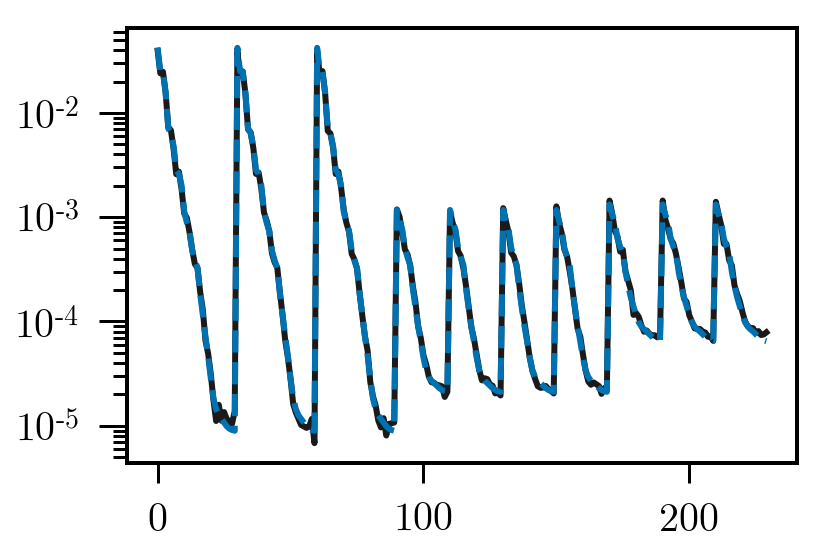

In [3]:

lmax = 10000
ACT_E = mfpy.ACT_E(th_l_max=lmax)

filename = 'data/wmap7_act_lcdm_bestfit_lensedCls_6000.dat'
data = np.genfromtxt(filename, unpack=True, usecols=(0,1),
                     dtype=[('ell', '<i8'),('cltt', '<f8')])
cl_th = np.zeros(lmax+1)
cl_th[data['ell']] = data['cltt']
# = mfpy.pad_arr_ell2(data['cltt'])

test_par = {
    'a_tSZ' : 4.66,
    'a_kSZ' : 1.60,
    'a_p' : 6.87,
    'beta_p' : 2.08,
    'a_c' : 6.10,
    'beta_c' : 2.08,
    'n_CIBC' : 1.20,
    'xi' : 0.09,
    'a_s' :3.50,
    'a_g' :0.88,
}

Cl_d = ACT_E.get_data_vector(l_max=lmax+1)
Cl_th = ACT_E.get_theory_vector(cl_th, test_par, l_max=lmax)

plt.plot( Cl_d)
plt.plot( Cl_th, '--')
plt.yscale('log')

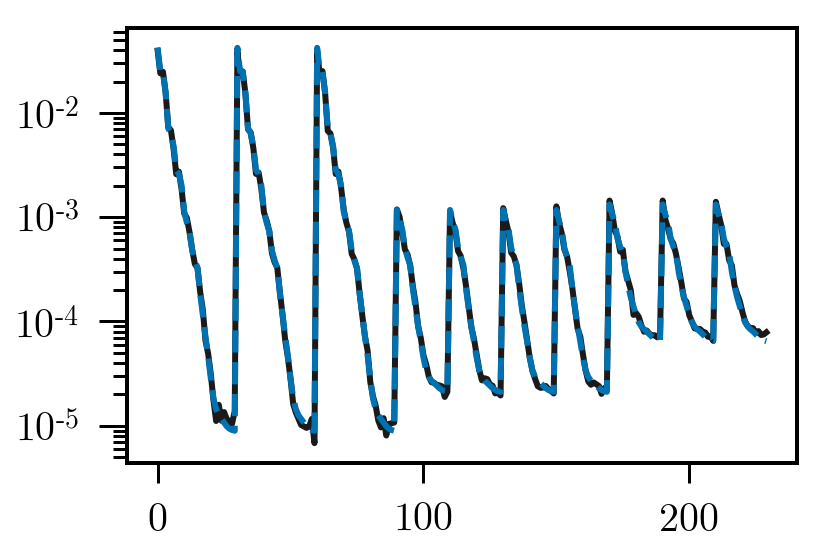

In [4]:
# Cl_d = ACT_E.get_data_vector(l_max=lmax+1)
Cl_th = ACT_E.get_theory_vector(cl_th, test_par, l_max=lmax)

plt.plot( Cl_d)
plt.plot( Cl_th, '--')
plt.yscale('log')

In [5]:
import scipy.linalg as linalg
good_cov = ACT_E.cov[:,ACT_E.good_bins][ACT_E.good_bins,:]
tmp = linalg.cho_solve( linalg.cho_factor(good_cov), b = (Cl_d - Cl_th) )
like = (Cl_d - Cl_th).T @ tmp
like

241.58252343230524

In [6]:
(like - 240.385376700682) / like

0.004955435991870049

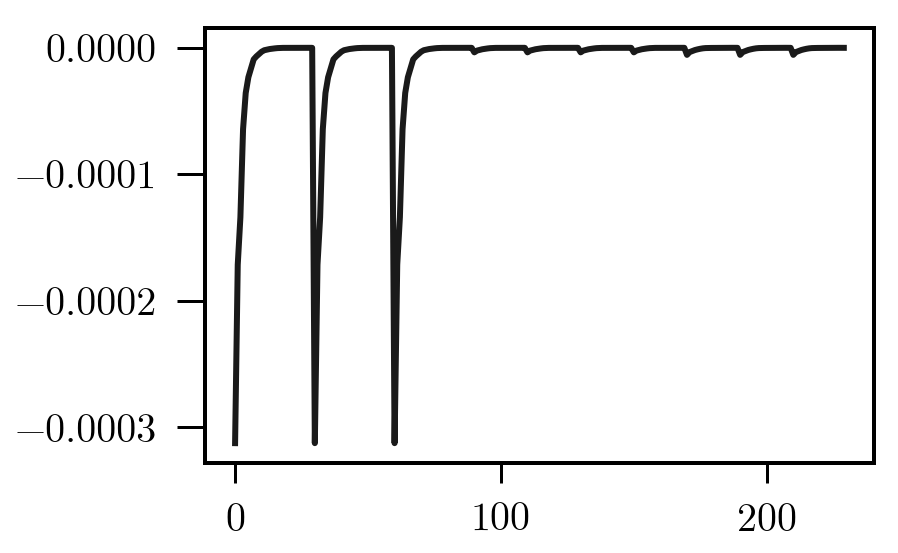

In [8]:
plt.plot((Cl_d - Cl_th) - np.genfromtxt('untitled.txt'))